In [4]:
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import torch
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import os.path as osp

makeTensor = transforms.ToTensor()
makePIL = transforms.ToPILImage()

def img_tensor(path):
    img = Image.open(path)
    return makeTensor(img)

def tensor_img(data,path="/home/fashionteam/data_pp/LAB.jpg"):
    img = makePIL(data)
    img.save(path)
    
def load_np(dr):
    return np.load(osp.join(dr,"np.npy"))

def load_source(dr):
    return np.array(Image.open(osp.join(dr,"source.png")))

def load_target(dr):
    return np.array(Image.open(osp.join(dr,"target.png")))

def load_warp(dr):
    return np.array(Image.open(osp.join(dr,"warp.png")))
def show(arr):
    plt.imshow(arr)
    
def scale(lnp_i,n,mode="height"):
    if mode == "height":
        return np.floor(n-(lnp_i+1)*n/2)
    elif mode == "width":
        return np.floor((lnp_i+1)*n/2)
    else:
        print("mode Error")
        print(1/0)
def visual_flow(flow,dense=0.05):
    width = len(flow[0]) #192
    height = len(flow) #256
    criterion_width = int(width*dense)
    criterion_height = int(width*dense)
    fig = plt.figure(figsize=(4.5,8))#figsize=(width, height))
    ax = fig.add_subplot(1,1,1) 
    ax.set(xlim=[0., width], ylim=[0, height], title='Flow', xlabel='width', ylabel='height')
    plt.plot((0,width-1,width-1,0,0),(0,0,height-1,height-1,0),color='red', linewidth=3)
    for i in range(height):
        for j in range(width):
            if i%criterion_height != 0 or j%criterion_width != 0:
                continue
            target_y = height-i
            target_x = j
            source_y = height - (flow[i,j,1]+1)*height/2
            source_x = (flow[i,j,0]+1)*width/2
            plt.arrow(source_x, source_y, target_x - source_x, target_y - source_y, length_includes_head=True, head_width=1.5, head_length=1.5,width=0.00005)
        
    plt.show()

In [28]:
dataroot = "./npz/default/1_6044"
lnp = load_np(dataroot)
ls = load_source(dataroot)
lt = load_target(dataroot)
lw = load_warp(dataroot)
print(lnp.shape)
print(ls.shape)

(2, 512, 512)
(512, 512, 3)


In [29]:
lnp_x = np.reshape(lnp[0],(-1,))
lnp_y = np.reshape(lnp[1],(-1,))
lnp_x = scale(lnp_x,ls.shape[0],"width")
lnp_y = scale(lnp_y,ls.shape[1],"height")
print(lnp_x.shape)

(262144,)


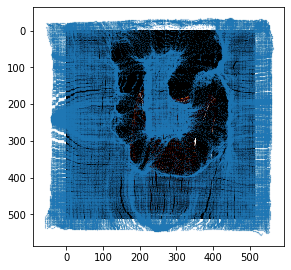

<Figure size 324x576 with 0 Axes>

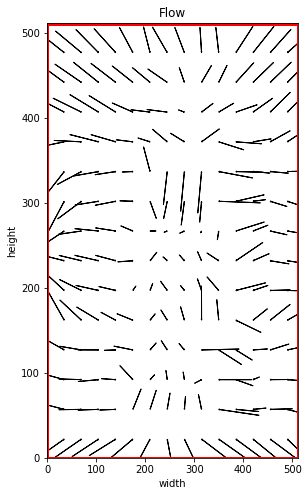

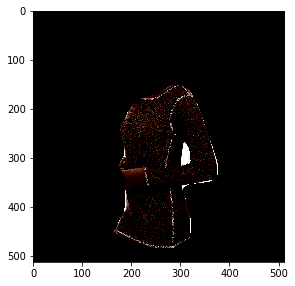

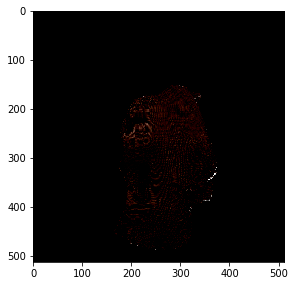

In [30]:
#plt.subplot(1,3,1)
fig = plt.figure(figsize=(4.5,8))
plt.imshow(ls)
plt.scatter(lnp_x,lnp_y,s=0.01)
plt.show()
#plt.subplot(1,3,3)
fig = plt.figure(figsize=(4.5,8))
visual_flow(np.transpose(lnp,(1,2,0)),0.07)
#plt.subplot(1,3,2)
fig = plt.figure(figsize=(4.5,8))
plt.imshow(lt)
fig = plt.figure(figsize=(4.5,8))
plt.imshow(lw)
plt.show()